# Commands to Prepare Files in Google Colab 

In [1]:
%cd /content

/content


In [2]:
!gdown https://drive.google.com/uc?id=1A4yorwNwSVQimtpGs4bZ7lfNXV_KGEpi

Downloading...
From: https://drive.google.com/uc?id=1A4yorwNwSVQimtpGs4bZ7lfNXV_KGEpi
To: /content/data.zip
100% 802M/802M [00:04<00:00, 164MB/s]


In [3]:
!ls

data  data.zip	model.png  sample_data


In [ ]:
!unzip data.zip

# Preprocessing

End result: batches of RGB image data containing training, validation, and test data with labels incorporated. (It is very difficult to combine these into X and y matrices, but the batch format is perfectly compatible with TensorFlow's models.)

In [5]:
from tensorflow import keras 
import tensorflow as tf
import numpy as np

In [6]:
path = "data/fruits-360_dataset/fruits-360/Training"

train_ds = keras.utils.image_dataset_from_directory(
    path, image_size = (100, 100), seed = 123, batch_size = 128, validation_split=0.2, subset="training", label_mode="categorical"
)

Found 67692 files belonging to 131 classes.
Using 54154 files for training.


In [7]:
path = "data/fruits-360_dataset/fruits-360/Training"

val_ds = keras.utils.image_dataset_from_directory(
    path, image_size = (100, 100), seed = 123, batch_size = 128, validation_split=0.2, subset="validation", label_mode="categorical"
)

Found 67692 files belonging to 131 classes.
Using 13538 files for validation.


In [8]:
path = "data/fruits-360_dataset/fruits-360/Test"

test_ds = keras.utils.image_dataset_from_directory(
    path, image_size=(100, 100), seed=123, batch_size=128, label_mode="categorical"
)

Found 22688 files belonging to 131 classes.


In [29]:
class_names = train_ds.class_names
class_names

['Apple Braeburn',
 'Apple Crimson Snow',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith',
 'Apple Pink Lady',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apricot',
 'Avocado',
 'Avocado ripe',
 'Banana',
 'Banana Lady Finger',
 'Banana Red',
 'Beetroot',
 'Blueberry',
 'Cactus fruit',
 'Cantaloupe 1',
 'Cantaloupe 2',
 'Carambula',
 'Cauliflower',
 'Cherry 1',
 'Cherry 2',
 'Cherry Rainier',
 'Cherry Wax Black',
 'Cherry Wax Red',
 'Cherry Wax Yellow',
 'Chestnut',
 'Clementine',
 'Cocos',
 'Corn',
 'Corn Husk',
 'Cucumber Ripe',
 'Cucumber Ripe 2',
 'Dates',
 'Eggplant',
 'Fig',
 'Ginger Root',
 'Granadilla',
 'Grape Blue',
 'Grape Pink',
 'Grape White',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',
 'Grapefruit Pink',
 'Grapefruit White',
 'Guava',
 'Hazelnut',
 'Huckleberry',
 'Kaki',
 'Kiwi',
 'Kohlrabi',
 'Kumquats',
 'Lemon',
 'Lemon Meyer',
 'Limes',
 'Lychee',
 'M

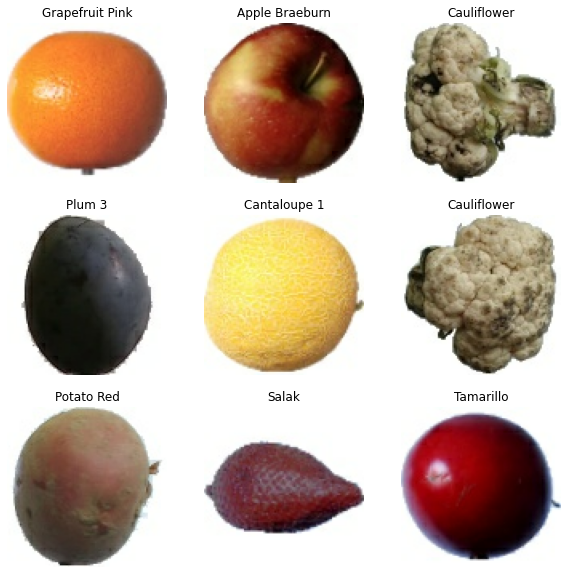

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[np.argmax(labels[i].numpy())])
    plt.axis("off")

# Code Taken From TensorFlow for Image Recognition



In [11]:
import tensorflow_datasets as tfds

In [12]:
num_classes = len(class_names)

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

In [13]:
model.compile(
  optimizer='adam',
  loss=tf.losses.CategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

In [14]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_loss', 
                   patience=5, verbose=1,
                   restore_best_weights=True)

In [15]:
model.fit(
  train_ds,
  callbacks=[es],
  validation_data=val_ds,
  epochs=50
)

Epoch 1/50
424/424 [==============================] - 48s 106ms/step - loss: 0.9276 - accuracy: 0.7743 - val_loss: 0.1137 - val_accuracy: 0.9700
Epoch 2/50
424/424 [==============================] - 44s 103ms/step - loss: 0.0474 - accuracy: 0.9862 - val_loss: 0.0795 - val_accuracy: 0.9769
Epoch 3/50


KeyboardInterrupt: ignored

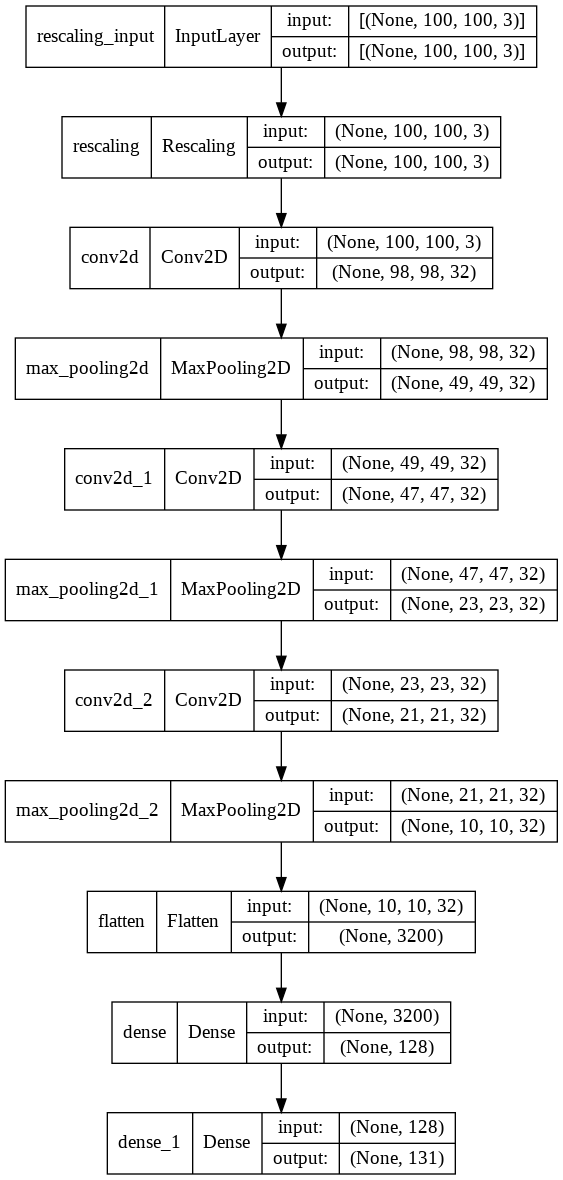

In [16]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True)

## Model Evaluation

In [57]:
model = loaded_model

In [58]:
model.evaluate(test_ds)

178/178 [==============================] - 14s 74ms/step - loss: 0.3507 - accuracy: 0.9662


[0.35068878531455994, 0.9661935567855835]

In [59]:
preds = model.predict(test_ds)

In [60]:
true = tf.concat([y for x, y in test_ds], axis=0)


In [61]:
preds_label = np.argmax(preds, axis=1)
true_label = np.argmax(true, axis=1)

In [62]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(preds_label, true_label)

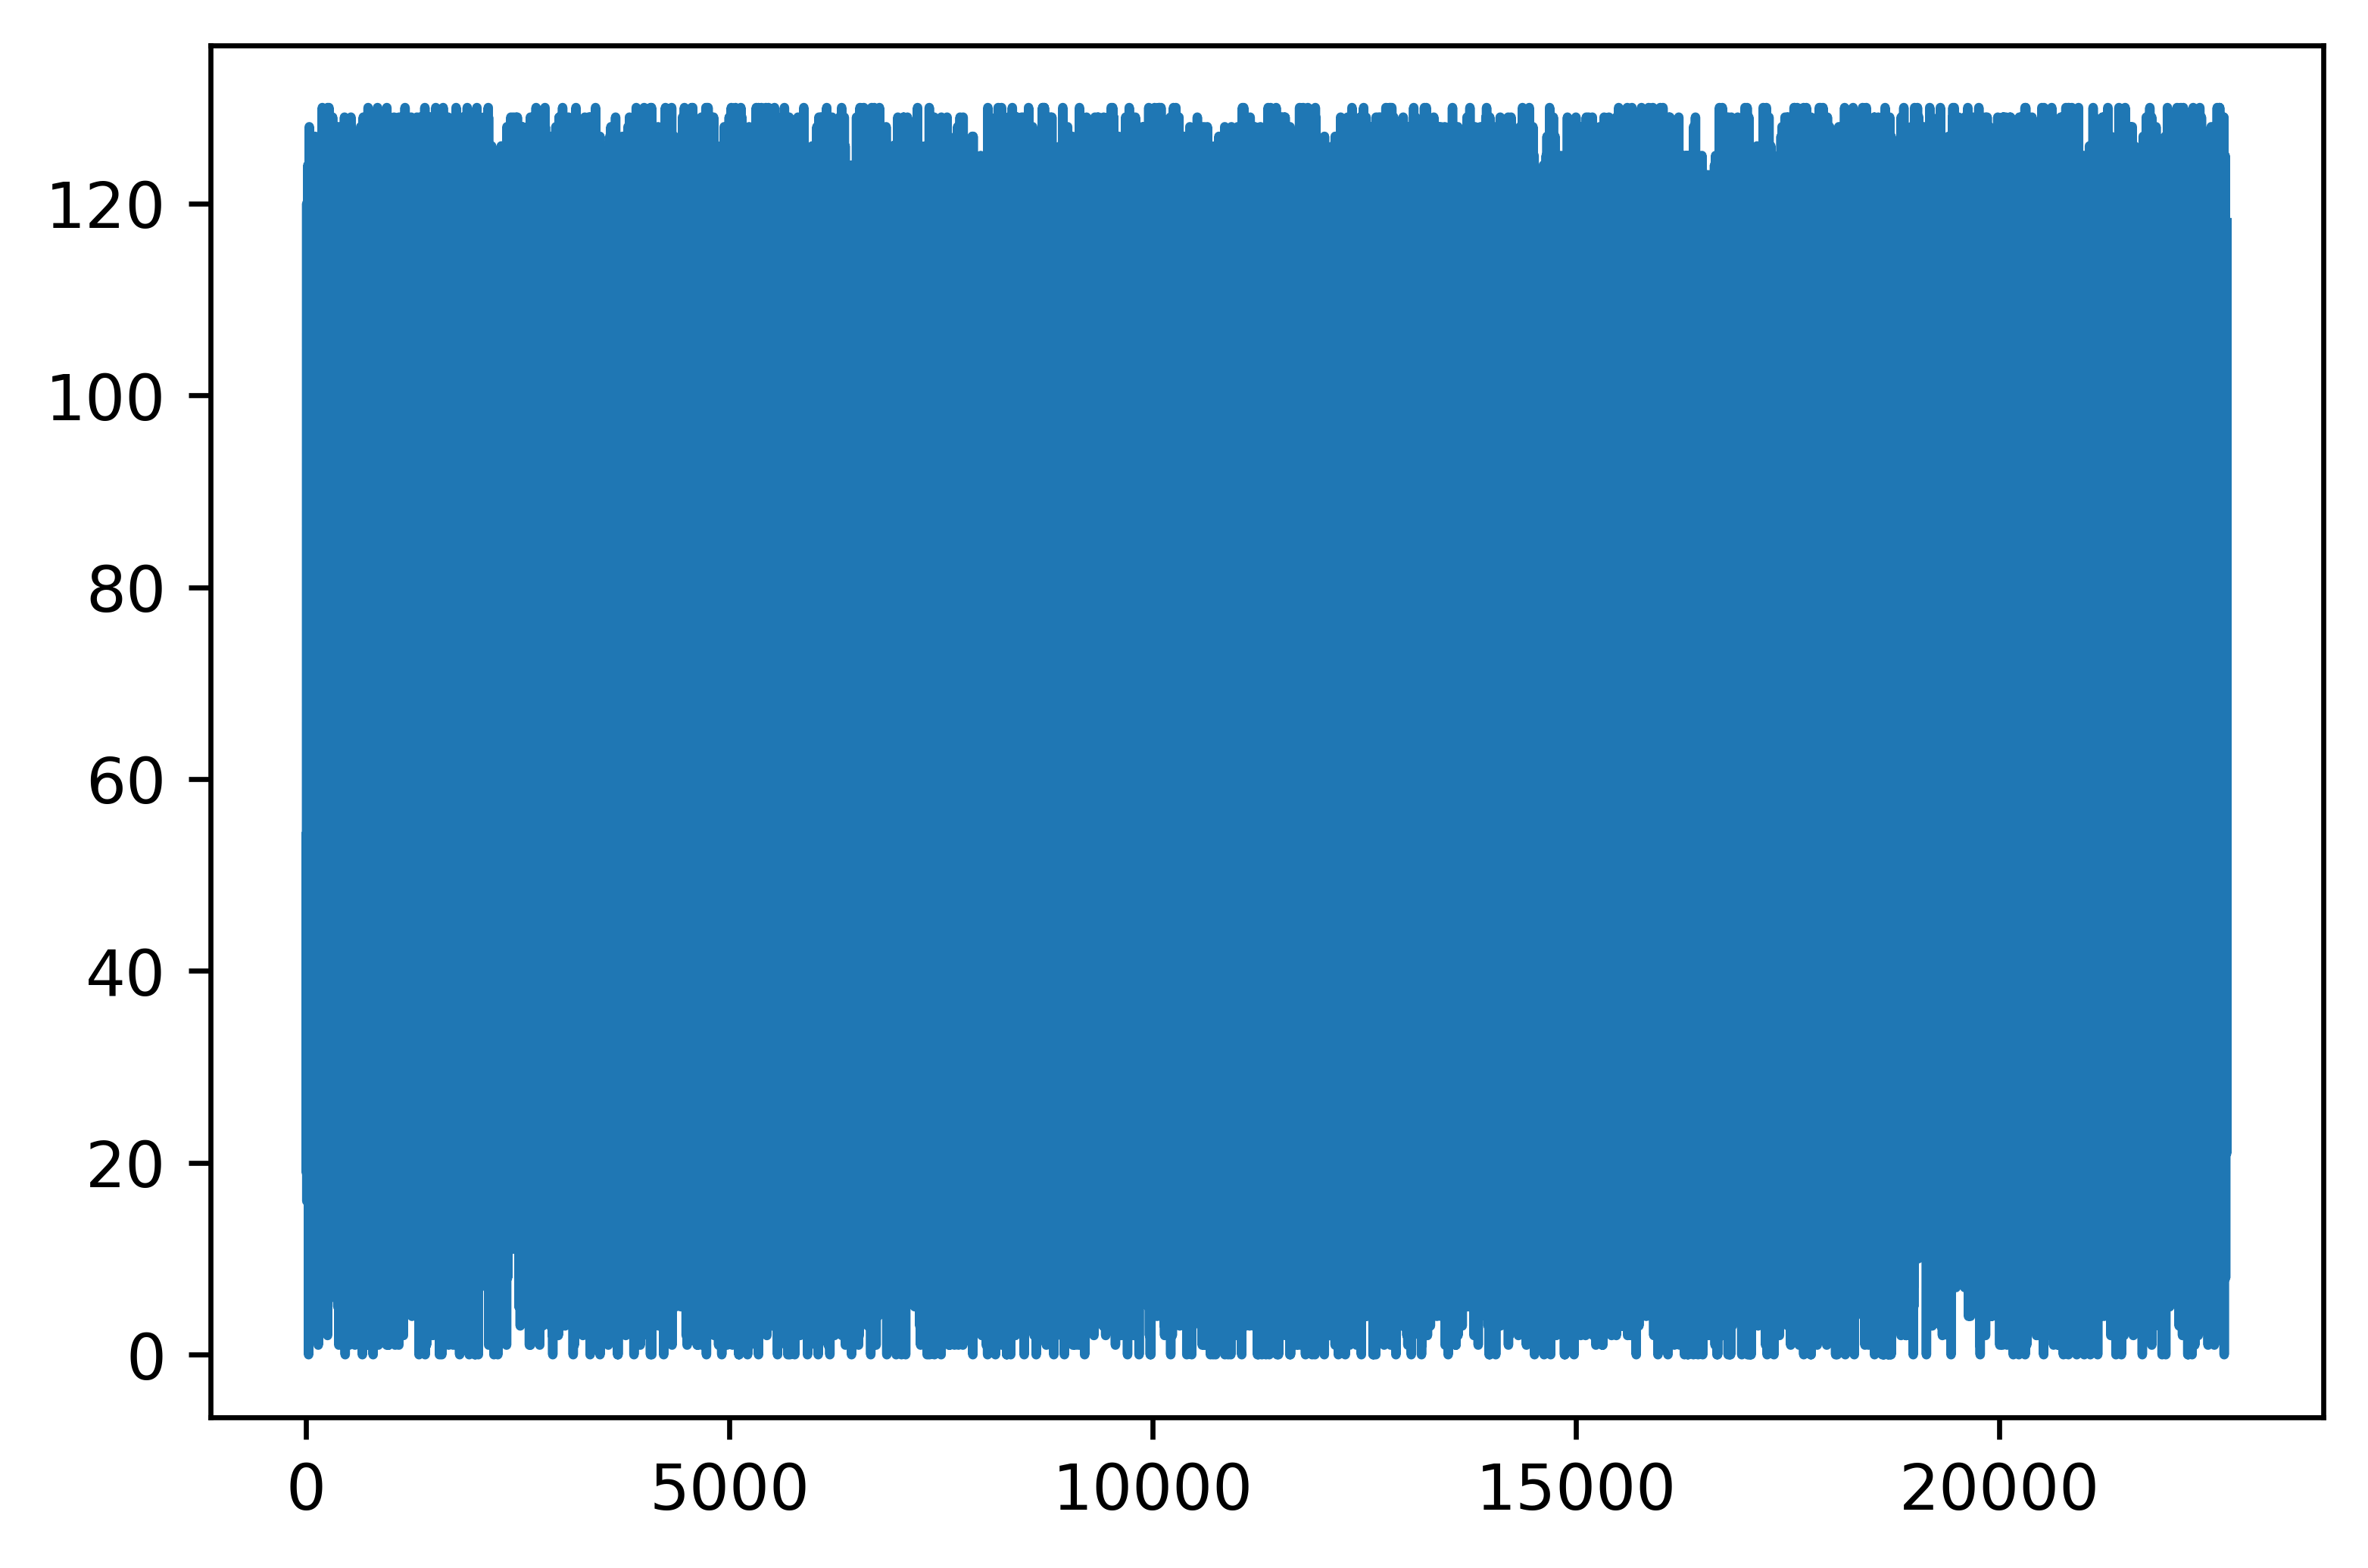

In [68]:
plt.plot(true_label)
plt.show()

In [64]:
import seaborn as sns

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 600

f,ax=plt.subplots(figsize=((32,32)))

hmap = sns.heatmap(conf, annot=False, linewidth=.5,fmt='.2f',ax=ax, square=True, cmap='YlGnBu', vmax = 150, vmin = 40)
hmap.set_xticklabels(hmap.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_xticklabels(class_names)
ax.set_yticklabels(class_names)


[Text(0, 0.5, 'Apple Braeburn'),
 Text(0, 1.5, 'Apple Crimson Snow'),
 Text(0, 2.5, 'Apple Golden 1'),
 Text(0, 3.5, 'Apple Golden 2'),
 Text(0, 4.5, 'Apple Golden 3'),
 Text(0, 5.5, 'Apple Granny Smith'),
 Text(0, 6.5, 'Apple Pink Lady'),
 Text(0, 7.5, 'Apple Red 1'),
 Text(0, 8.5, 'Apple Red 2'),
 Text(0, 9.5, 'Apple Red 3'),
 Text(0, 10.5, 'Apple Red Delicious'),
 Text(0, 11.5, 'Apple Red Yellow 1'),
 Text(0, 12.5, 'Apple Red Yellow 2'),
 Text(0, 13.5, 'Apricot'),
 Text(0, 14.5, 'Avocado'),
 Text(0, 15.5, 'Avocado ripe'),
 Text(0, 16.5, 'Banana'),
 Text(0, 17.5, 'Banana Lady Finger'),
 Text(0, 18.5, 'Banana Red'),
 Text(0, 19.5, 'Beetroot'),
 Text(0, 20.5, 'Blueberry'),
 Text(0, 21.5, 'Cactus fruit'),
 Text(0, 22.5, 'Cantaloupe 1'),
 Text(0, 23.5, 'Cantaloupe 2'),
 Text(0, 24.5, 'Carambula'),
 Text(0, 25.5, 'Cauliflower'),
 Text(0, 26.5, 'Cherry 1'),
 Text(0, 27.5, 'Cherry 2'),
 Text(0, 28.5, 'Cherry Rainier'),
 Text(0, 29.5, 'Cherry Wax Black'),
 Text(0, 30.5, 'Cherry Wax Red'),
 T

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
print("Precision : " + precision_score(test_label, preds_label, average='macro'))
print("F1 : " + f1_score(test_label, preds_label, average='macro'))
print("Recall : " + recall_score(test_label, preds_label, average='macro'))

# Transfer Learning with Imagenet

In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3, preprocess_input
from tensorflow.keras.models import Model # Sequential 
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras import backend as K

In [ ]:
base_model = InceptionV3(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu', kernel_initializer="he_normal")(x)
predictions = Dense(num_classes, activation='softmax')(x)
transfer_model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
  layer.trainable = False 

transfer_model.compile(optimizer='adam', metrics=['accuracy'], loss='categorical_crossentropy')

In [ ]:
transfer_model.fit(
    train_ds, callbacks=[es],
    validation_data = val_ds, 
    epochs=50)

# Testing Trained Model on Custom Images

Prediction for Image Below: Watermelon


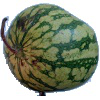

In [ ]:
import PIL
image_path = "/content/data/fruits-360_dataset/fruits-360/Test/Watermelon/r_113_100.jpg"

image = PIL.Image.open(image_path)
image_resized = image.resize((100, 100))
image_array = np.array(image_resized).reshape(1, 100, 100, 3)

print("Prediction for Image Below:", class_names[np.argmax(model.predict(image_array))])
image_resized

# How to Save and Load Trained Models

In [ ]:
model.save("/content/saved_model")

INFO:tensorflow:Assets written to: /content/saved_model/assets


In [49]:
!wget https://github.com/VSTADeepLearning/FruitVegetableDetection/tree/main/saved_model


--2021-12-12 22:37:07--  https://github.com/VSTADeepLearning/FruitVegetableDetection/tree/main/saved_model
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/html]
Saving to: ‘saved_model’

saved_model             [ <=>                ] 144.03K  --.-KB/s    in 0.07s   

2021-12-12 22:37:07 (1.99 MB/s) - ‘saved_model’ saved [147484]



In [55]:
!gdown https://drive.google.com/uc?id=1gYsQyOMmg2q_ypvePZVwEL70I400diEv
!unzip saved_model.zip


Downloading...
From: https://drive.google.com/uc?id=1gYsQyOMmg2q_ypvePZVwEL70I400diEv
To: /content/saved_model.zip
100% 4.34M/4.34M [00:00<00:00, 34.1MB/s]
Archive:  saved_model.zip
   creating: saved_model/
  inflating: saved_model/.DS_Store   
  inflating: saved_model/keras_metadata.pb  
   creating: saved_model/variables/
  inflating: saved_model/variables/variables.data-00000-of-00001  
  inflating: saved_model/variables/variables.index  
  inflating: saved_model/saved_model.pb  
   creating: saved_model/assets/


In [56]:
loaded_model = tf.keras.models.load_model("/content/saved_model")

In [ ]:
!zip -r saved_model.zip saved_model

from google.colab import files
files.download("/content/saved_model.zip")

updating: saved_model/ (stored 0%)
updating: saved_model/variables/ (stored 0%)
updating: saved_model/variables/variables.data-00000-of-00001 (deflated 20%)
updating: saved_model/variables/variables.index (deflated 67%)
updating: saved_model/assets/ (stored 0%)
updating: saved_model/saved_model.pb (deflated 89%)
updating: saved_model/keras_metadata.pb (deflated 91%)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>